In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Reading data

In [3]:
data = pd.read_csv("DM - 3 - dataset.csv")
data.head()

,Power(watts),Distance(metres),Heartrate(BPM),Speed(m/s),WindSpeed (m/s),Cadaence(revs/s),Elevation(meters),Hill slope(%),Temperature(C),Cluster
0,0.0,0.000,57.0,1.4305,1.6093,0.0,55.778,-2.85,25.556,C
1,0.0,0.000,57.0,1.6540,2.9505,0.0,55.778,-4.40,25.556,C
2,0.0,0.000,57.0,2.5034,3.1740,0.0,55.778,-5.85,25.556,C
3,0.0,16.093,61.0,2.5034,3.8445,0.0,55.778,-6.30,25.556,C
4,0.0,16.093,62.0,2.5481,3.2187,0.0,55.778,-5.62,25.556,C


# Visualizing

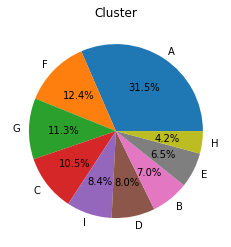

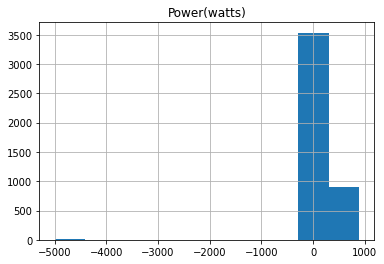

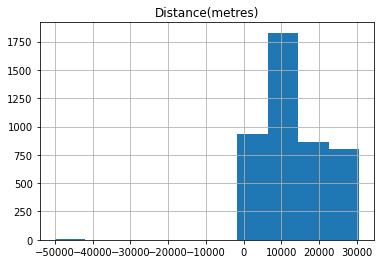

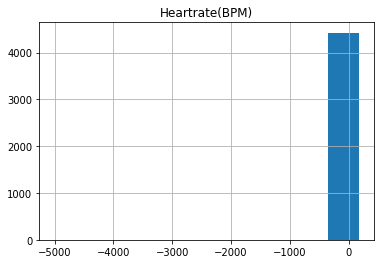

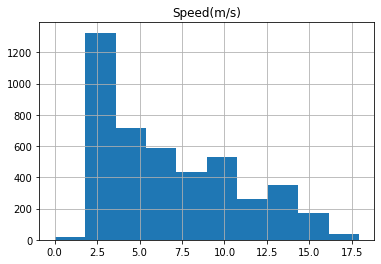

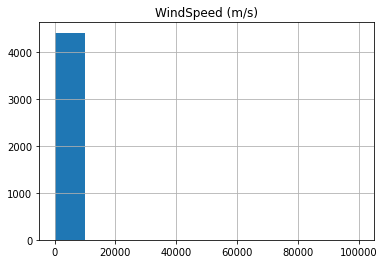

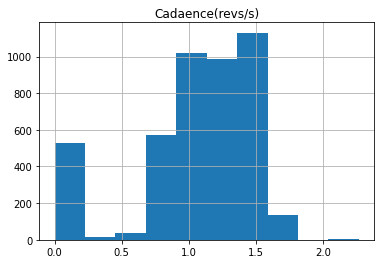

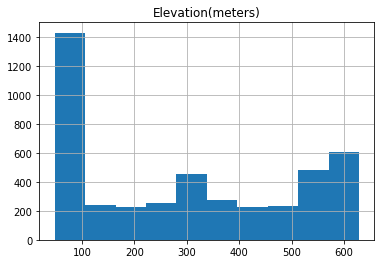

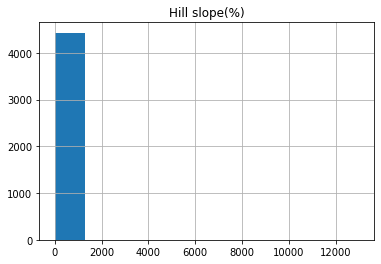

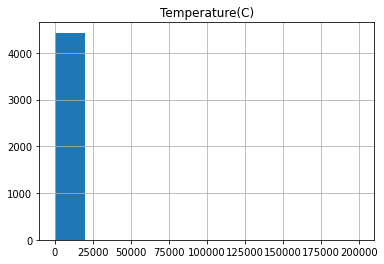

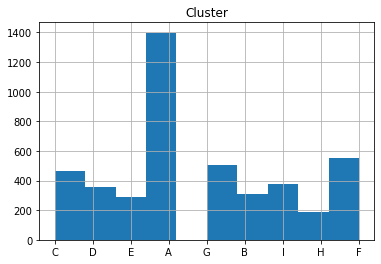

In [5]:
def show_pie_chart(data, column):
    dic = data[column].value_counts()
    plt.pie(dic.values, labels=dic.index.values, autopct='%1.1f%%')
    plt.title(column)
    plt.show()


def show_histogram_chart(data, column):
    data[column].hist()
    plt.title(column)
    plt.show()


show_pie_chart(data, 'Cluster')

for col in data.columns:
    show_histogram_chart(data, col)

# Preprocessing

## Plots

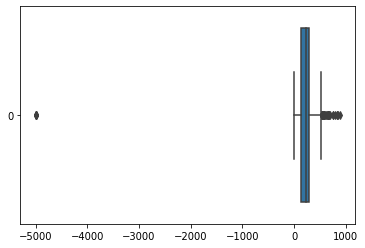

In [6]:
sns.boxplot(data=data["Power(watts)"], orient="h")

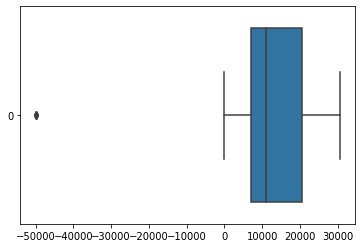

In [7]:
sns.boxplot(data=data["Distance(metres)"], orient="h")

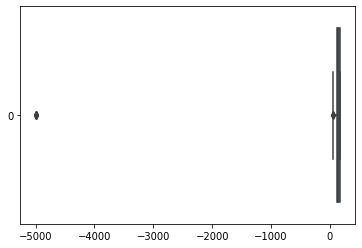

In [8]:
sns.boxplot(data=data["Heartrate(BPM)"], orient="h")

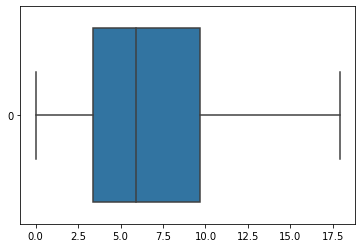

In [9]:
sns.boxplot(data=data["Speed(m/s)"], orient="h")

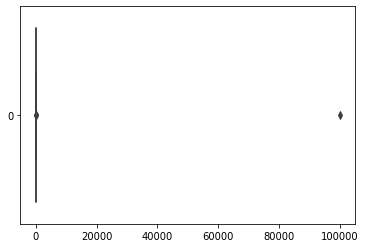

In [10]:
sns.boxplot(data=data["WindSpeed (m/s)"], orient="h")

## Removing outlier row

In [11]:
print(data.iloc[2269,8])
data = data.drop(2269).reset_index(drop=True)
label = data["Cluster"].values
data.iloc[2269]
# data.head()

200000.0


Power(watts)          296.79
Distance(metres)     11201.0
Heartrate(BPM)         171.0
Speed(m/s)            3.0846
WindSpeed (m/s)       1.6987
Cadaence(revs/s)         0.9
Elevation(meters)     570.28
Hill slope(%)          12.68
Temperature(C)        20.556
Cluster                    A
Name: 2269, dtype: object

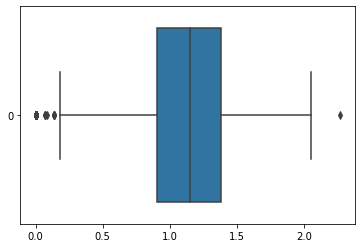

In [12]:
sns.boxplot(data=data["Cadaence(revs/s)"], orient="h")

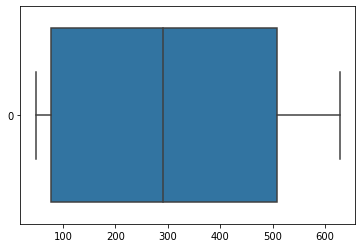

In [13]:
sns.boxplot(data=data["Elevation(meters)"], orient="h")

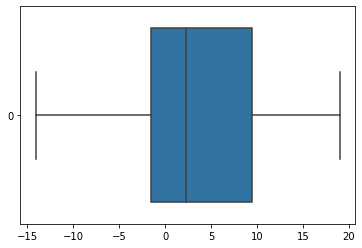

In [14]:
sns.boxplot(data=data["Hill slope(%)"], orient="h")

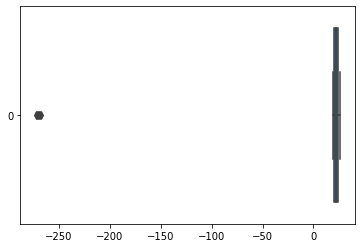

In [15]:
sns.boxplot(data=data["Temperature(C)"], orient="h")

## Encoding "Cluster" column in dataset

In [16]:
from sklearn.preprocessing import LabelEncoder
data["Cluster"] = LabelEncoder().fit_transform(data["Cluster"])
data.iloc[3166]

Power(watts)           384.6400
Distance(metres)     18395.0000
Heartrate(BPM)         139.0000
Speed(m/s)              10.9970
WindSpeed (m/s)         11.1310
Cadaence(revs/s)         1.4833
Elevation(meters)      511.7600
Hill slope(%)           -0.9300
Temperature(C)          18.8890
Cluster                  8.0000
Name: 3166, dtype: float64

## Detecting missing values

In [17]:
print(data.isnull().sum())
bool_series = pd.isnull(data["WindSpeed (m/s)"])
data[bool_series].head()

Power(watts)          2
Distance(metres)      3
Heartrate(BPM)        5
Speed(m/s)            5
WindSpeed (m/s)      18
Cadaence(revs/s)      4
Elevation(meters)     1
Hill slope(%)         2
Temperature(C)        2
Cluster               0
dtype: int64


,Power(watts),Distance(metres),Heartrate(BPM),Speed(m/s),WindSpeed (m/s),Cadaence(revs/s),Elevation(meters),Hill slope(%),Temperature(C),Cluster
2191,NaN,NaN,165.0,4.4704,NaN,1.15,543.15,5.68,21.667,0
2192,231.68,10960.0,166.0,4.5151,NaN,1.15,543.15,5.58,21.667,0
2193,233.70,10960.0,166.0,4.5151,NaN,NaN,543.15,5.68,21.111,0
2194,233.80,10960.0,166.0,4.6045,NaN,NaN,543.15,5.88,21.111,0
2195,231.81,10960.0,166.0,4.6045,NaN,NaN,544.07,NaN,NaN,0


## Filling the missing values with mean of each column

In [18]:
data["Power(watts)"] = data["Power(watts)"].fillna(data["Power(watts)"].mean())
data["Distance(metres)"] = data["Distance(metres)"].fillna(data["Distance(metres)"].mean())
data["Heartrate(BPM)"] = data["WindSpeed (m/s)"].fillna(data['WindSpeed (m/s)'].mean())
data["Speed(m/s)"] = data["Speed(m/s)"].fillna(data["Speed(m/s)"].mean())
data["WindSpeed (m/s)"] = data["WindSpeed (m/s)"].fillna(data['WindSpeed (m/s)'].mean())
data["Cadaence(revs/s)"] = data["Cadaence(revs/s)"].fillna(data["Cadaence(revs/s)"].mean())
data["Elevation(meters)"] = data["Elevation(meters)"].fillna(data['Elevation(meters)'].mean())
data["Hill slope(%)"] = data["Hill slope(%)"].fillna(data['Hill slope(%)'].mean())
data["Temperature(C)"] = data["Temperature(C)"].fillna(data['Temperature(C)'].mean())
print(data.isnull().sum())
data.iloc[2192], data.iloc[2193]

Power(watts)         0
Distance(metres)     0
Heartrate(BPM)       0
Speed(m/s)           0
WindSpeed (m/s)      0
Cadaence(revs/s)     0
Elevation(meters)    0
Hill slope(%)        0
Temperature(C)       0
Cluster              0
dtype: int64


(Power(watts)           231.680000
 Distance(metres)     10960.000000
 Heartrate(BPM)           6.274782
 Speed(m/s)               4.515100
 WindSpeed (m/s)          6.274782
 Cadaence(revs/s)         1.150000
 Elevation(meters)      543.150000
 Hill slope(%)            5.580000
 Temperature(C)          21.667000
 Cluster                  0.000000
 Name: 2192, dtype: float64, Power(watts)           233.700000
 Distance(metres)     10960.000000
 Heartrate(BPM)           6.274782
 Speed(m/s)               4.515100
 WindSpeed (m/s)          6.274782
 Cadaence(revs/s)         1.057570
 Elevation(meters)      543.150000
 Hill slope(%)            5.680000
 Temperature(C)          21.111000
 Cluster                  0.000000
 Name: 2193, dtype: float64)

## Spliting dataset from "Cluster" column

In [19]:
X = data.drop("Cluster", axis = 1)
y = data["Cluster"]

# Clustering

## K-Means

In [24]:
X

,Power(watts),Distance(metres),Heartrate(BPM),Speed(m/s),WindSpeed (m/s),Cadaence(revs/s),Elevation(meters),Hill slope(%),Temperature(C)
0,0.0,0.000,1.6093,1.43050,1.6093,0.0,55.778,-2.85,25.556
1,0.0,0.000,2.9505,1.65400,2.9505,0.0,55.778,-4.40,25.556
2,0.0,0.000,3.1740,2.50340,3.1740,0.0,55.778,-5.85,25.556
3,0.0,16.093,3.8445,2.50340,3.8445,0.0,55.778,-6.30,25.556
4,0.0,16.093,3.2187,2.54810,3.2187,0.0,55.778,-5.62,25.556
...,...,...,...,...,...,...,...,...,...
4429,0.0,30610.000,1.8329,3.03990,1.8329,0.0,54.559,-1.20,22.778
4430,0.0,30626.000,0.0000,2.59280,0.0000,0.0,54.559,-1.77,22.778
4431,0.0,30626.000,0.0000,1.69870,0.0000,0.0,54.559,-1.29,22.778
4432,0.0,30626.000,0.0000,0.98349,0.0000,0.0,54.559,0.09,22.778


In [81]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=9, random_state=0)
kmeans.fit(X)
predicted_y = kmeans.predict(X)
y, predicted_y

(0       2
 1       2
 2       2
 3       2
 4       2
        ..
 4429    5
 4430    5
 4431    5
 4432    5
 4433    5
 Name: Cluster, Length: 4434, dtype: int64,
 array([0, 0, 0, ..., 3, 3, 3], dtype=int32))

#### Maping the "predicted_y" values to main labels (y)

In [82]:
kmeans0, kmeans1, kmeans2, kmeans3, kmeans4, kmeans5, kmeans6, kmeans7, kmeans8 = [[] for i in range(9)]
allLength_y = len(y)
for i in range(allLength_y):
  if y[i] == 0:
    kmeans0.append(predicted_y[i])
  if y[i] == 1:
    kmeans1.append(predicted_y[i])
  if y[i] == 2:
    kmeans2.append(predicted_y[i])
  if y[i] == 3:
    kmeans3.append(predicted_y[i])
  if y[i] == 4:
    kmeans4.append(predicted_y[i])
  if y[i] == 5:
    kmeans5.append(predicted_y[i])
  if y[i] == 6:
    kmeans6.append(predicted_y[i])
  if y[i] == 7:
    kmeans7.append(predicted_y[i])
  if y[i] == 8:
    kmeans8.append(predicted_y[i])
probability_p = [len(kmeans0)/allLength_y, len(kmeans1)/allLength_y, len(kmeans2)/allLength_y, len(kmeans3)/allLength_y, len(kmeans4)/allLength_y, len(kmeans5)/allLength_y, len(kmeans6)/allLength_y , len(kmeans7)/allLength_y, len(kmeans8)/allLength_y]

In [83]:
from collections import Counter
Counter(kmeans0).most_common(), Counter(kmeans1).most_common(), Counter(kmeans2).most_common(), \
Counter(kmeans3).most_common(), Counter(kmeans4).most_common(), Counter(kmeans5).most_common(), \
Counter(kmeans6).most_common(), Counter(kmeans7).most_common(), Counter(kmeans8).most_common()

([(2, 824), (4, 565), (5, 6), (7, 3)],
 [(8, 104), (1, 101), (7, 82), (6, 22), (2, 3)],
 [(0, 371), (4, 96)],
 [(0, 231), (4, 125)],
 [(4, 140), (7, 66), (1, 56), (2, 28)],
 [(3, 231), (8, 211), (6, 107)],
 [(7, 271), (1, 162), (2, 69), (4, 1)],
 [(8, 62), (3, 61), (1, 46), (6, 16)],
 [(6, 189), (8, 110), (3, 56), (1, 19)])

In [84]:
cluster0Count, cluster1Count, cluster2Count, cluster3Count, cluster4Count, cluster5Count, cluster6Count, cluster7Count, cluster8Count = [0 for i in range(9)]
allLength = len(predicted_y)
for i in range(allLength):
  if predicted_y[i] == 0:
    cluster0Count += 1
  if predicted_y[i] == 1:
    cluster1Count += 1
  if predicted_y[i] == 2:
    cluster2Count += 1
  if predicted_y[i] == 3:
    cluster3Count += 1
  if predicted_y[i] == 4:
    cluster4Count += 1
  if predicted_y[i] == 5:
    cluster5Count += 1
  if predicted_y[i] == 6:
    cluster6Count += 1
  if predicted_y[i] == 7:
    cluster7Count += 1
  if predicted_y[i] == 8:
    cluster8Count += 1
probability_q = [cluster0Count/allLength, cluster1Count/allLength,cluster2Count/allLength, cluster3Count/allLength, cluster4Count/allLength, cluster5Count/allLength, cluster6Count/allLength ,cluster7Count/allLength, cluster8Count/allLength]

### Entropy

In [85]:
from scipy.stats import entropy

entropy(probability_p, probability_q)

0.65395337962113

### BCubed

In [ ]:
gold = {i:{cluster} for i,cluster in enumerate(y)}
pred = {i:{cluster} for i,cluster in enumerate(predicted_y)}
precision = bcubed.precision(gold, pred)
recall = bcubed.recall(gold, pred)
fscore = bcubed.fscore(precision, recall)
precision, recall, fscore

(0.45255790666224616, 0.5027295190874059, 0.47632620851671875)

## Hierachichal

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agglomerative = AgglomerativeClustering(n_clusters=9)
predicted_y = agglomerative.fit_predict(data)
predicted_y

array([3, 3, 3, ..., 5, 5, 5], dtype=int64)

#### Maping the "predicted_y" values to main labels (y)

In [ ]:
hie0, hie1, hie2, hie3, hie4, hie5, hie6, hie7, hie8 = [[] for i in range(9)]
allLength_y = len(y)
for i in range(allLength_y):
  if y[i] == 0:
    hie0.append(predicted_y[i])
  if y[i] == 1:
    hie1.append(predicted_y[i])
  if y[i] == 2:
    hie2.append(predicted_y[i])
  if y[i] == 3:
    hie3.append(predicted_y[i])
  if y[i] == 4:
    hie4.append(predicted_y[i])
  if y[i] == 5:
    hie5.append(predicted_y[i])
  if y[i] == 6:
    hie6.append(predicted_y[i])
  if y[i] == 7:
    hie7.append(predicted_y[i])
  if y[i] == 8:
    hie8.append(predicted_y[i])
probability_p = [len(hie0)/allLength_y, len(hie1)/allLength_y, len(hie2)/allLength_y, len(hie3)/allLength_y, len(hie4)/allLength_y, len(hie5)/allLength_y, len(hie6)/allLength_y , len(hie7)/allLength_y, len(hie8)/allLength_y]

In [ ]:
from collections import Counter
Counter(hie0).most_common(), Counter(hie1).most_common(), Counter(hie2).most_common(), \
Counter(hie3).most_common(), Counter(hie4).most_common(), Counter(hie5).most_common(), \
Counter(hie6).most_common(), Counter(hie7).most_common(), Counter(hie8).most_common()

([(1, 943), (2, 446), (4, 6), (7, 3)],
 [(0, 137), (6, 90), (7, 63), (8, 22)],
 [(3, 373), (2, 94)],
 [(3, 231), (2, 125)],
 [(2, 135), (7, 66), (0, 56), (1, 33)],
 [(5, 255), (6, 211), (8, 83)],
 [(7, 283), (0, 162), (1, 57), (2, 1)],
 [(0, 77), (5, 65), (6, 31), (8, 12)],
 [(8, 128), (6, 118), (0, 72), (5, 56)])

In [ ]:
HieCluster0Count, HieCluster1Count, HieCluster2Count, HieCluster3Count, HieCluster4Count, HieCluster5Count, HieCluster6Count, HieCluster7Count, HieCluster8Count = [0 for i in range(9)]
allLength = len(predicted_y)
for i in range(allLength):
  if predicted_y[i] == 0:
    HieCluster0Count += 1
  if predicted_y[i] == 1:
    HieCluster1Count += 1
  if predicted_y[i] == 2:
    HieCluster2Count += 1
  if predicted_y[i] == 3:
    HieCluster3Count += 1
  if predicted_y[i] == 4:
    HieCluster4Count += 1
  if predicted_y[i] == 5:
    HieCluster5Count += 1
  if predicted_y[i] == 6:
    HieCluster6Count += 1
  if predicted_y[i] == 7:
    HieCluster7Count += 1
  if predicted_y[i] == 8:
    HieCluster8Count += 1
probability_q = [HieCluster0Count/allLength, HieCluster1Count/allLength,HieCluster2Count/allLength, HieCluster3Count/allLength, HieCluster4Count/allLength, HieCluster5Count/allLength, HieCluster6Count/allLength ,HieCluster7Count/allLength, HieCluster8Count/allLength]

### Entropy

In [ ]:
from scipy.stats import entropy

entropy(probability_p, probability_q)

0.453264914495673

### BCubed

In [ ]:
import bcubed
gold = {i:{cluster} for i,cluster in enumerate(y)}
pred = {i:{cluster} for i,cluster in enumerate(predicted_y)}
precision = bcubed.precision(gold, pred)
recall = bcubed.recall(gold, pred)
fscore = bcubed.fscore(precision, recall)
precision, recall, fscore

(0.46818677315329377, 0.510170190323647, 0.4882776820390254)

## PCA

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca2 = []
indexes = []
for i in range(len(X_pca)):
    if (X_pca[i][1] < 4000):
        X_pca2.append(X_pca[i])
    else:
        indexes.append(i)

In [36]:
print(len(X_pca), len(X_pca2))

4434 4428


In [52]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=55, min_samples=3).fit_predict(X_pca)
clustering2 = []
for i in range(len(clustering)):
    if (i not in indexes):
        clustering2.append(clustering[i])
# list(clustering)
# clustering2[3500:4000]

In [ ]:
clustering2[:30]

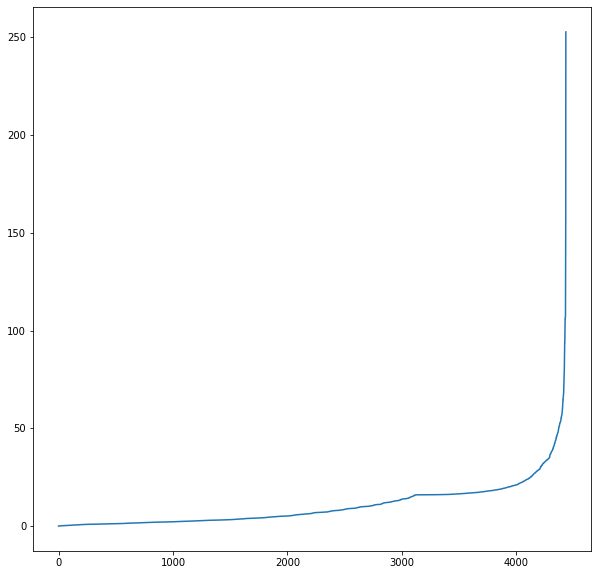

In [53]:
from sklearn.neighbors import NearestNeighbors 
nearestObj = NearestNeighbors(n_neighbors=2)
nearestFit=nearestObj.fit(X)
distances,temp = nearestFit.kneighbors(X)

distances = np.sort(distances, axis = 0)
distances = distances[:, 1]
plt.figure(figsize=(10, 10))
plt.plot(distances)
plt.show()

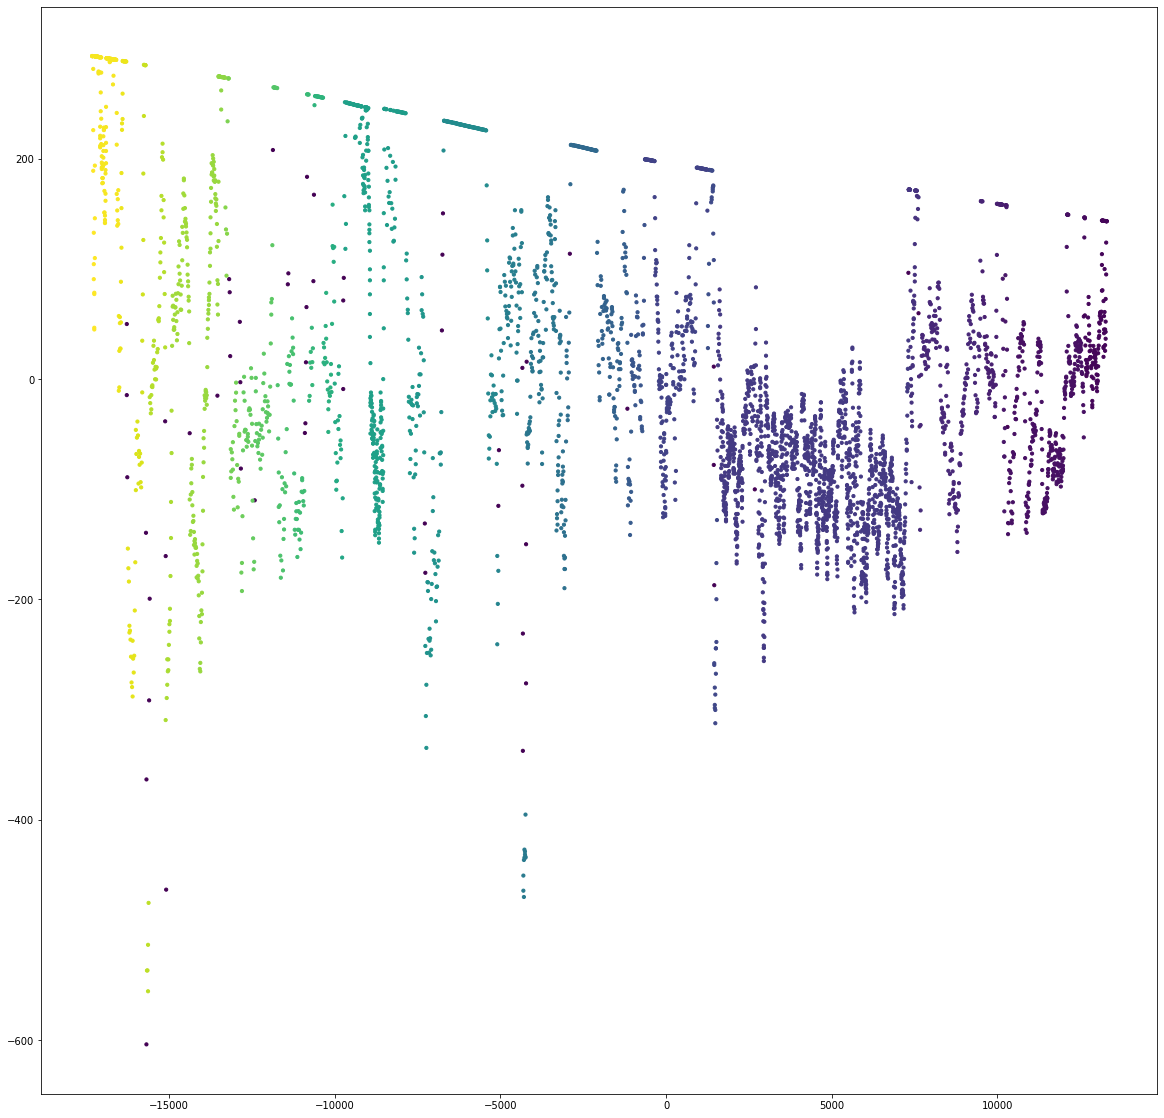

In [70]:
X_pca2[0][0]
x_axis = list()
y_axis = list()
# x_axis
for i in range(len(X_pca2)):
    x_axis.append(X_pca2[i][0])
    y_axis.append(X_pca2[i][1])
# x_axis
plt.figure(figsize=(20, 20))
plt.scatter(x_axis, y_axis, c=clustering2, s=10)